### Student Activity: Prepare Data and Train a Prophet Model

This program is **part 1** of a two-part student activity. 

The first part reads in the CSV of hourly crypto trading data, conducts exploratory data analysis, and builds a forecast model using the Facebook Prophet package.

## Part 1: Reading in and Preparing the Data

### Import the required libraries and dependencies

In [5]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

### Read in, prepare, and visualize the data

In [6]:
# Read csv file as DataFrame, with the first column as row index
data_path = Path("../Resources/bitcoin_hourly.csv")
df = pd.read_csv(data_path, infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop('volume', axis=1)

# Preview the dataset
df.head()

,date,close
0,2017-08-17 05:00:00.000,4315.32
1,2017-08-17 06:00:00.000,4324.35
2,2017-08-17 07:00:00.000,4349.99
3,2017-08-17 08:00:00.000,4360.69
4,2017-08-17 09:00:00.000,4444.00


In [7]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

# View dataframe shape, and the first and last five rows of the  DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

,ds,y
0,2017-08-17 05:00:00.000,4315.32
1,2017-08-17 06:00:00.000,4324.35
2,2017-08-17 07:00:00.000,4349.99
3,2017-08-17 08:00:00.000,4360.69
4,2017-08-17 09:00:00.000,4444.00


,ds,y
30743,2021-02-12 01:00:00.000,48477.50
30744,2021-02-12 02:00:00.000,47935.66
30745,2021-02-12 03:00:00.000,47587.31
30746,2021-02-12 04:00:00.000,47271.55
30747,2021-02-12 05:00:00.000,47398.79


In [8]:
# sort the DataFrame by ds in ascending order, so to arrange the data chronologically from past to present
df = df.sort_values(by=['ds'])

# Use hvPlot to visually inspect the price data
df.hvplot(x='ds', y ='y')

:Curve   [ds]   (y)

## Create a Prophet Model and Make Predictions

### Fitting the Model

In [9]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [10]:
# Fit the time-series model.
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Making Model Predictions

In [11]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days, or 1000/24 = 40)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the first and last five rows of the future dataframe
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-08-17 05:00:00
1,2017-08-17 06:00:00
2,2017-08-17 07:00:00
3,2017-08-17 08:00:00
4,2017-08-17 09:00:00


,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


In [12]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5744.792600,2990.030561,5676.188381,5744.792600,5744.792600,-1461.468052,-1461.468052,-1461.468052,-5.984690,...,10.809065,10.809065,10.809065,-1466.292427,-1466.292427,-1466.292427,0.0,0.0,0.0,4283.324549
1,2017-08-17 06:00:00,5751.499652,3039.703825,5577.684084,5751.499652,5751.499652,-1465.177830,-1465.177830,-1465.177830,-4.015305,...,11.595956,11.595956,11.595956,-1472.758481,-1472.758481,-1472.758481,0.0,0.0,0.0,4286.321822
2,2017-08-17 07:00:00,5758.206704,2842.909793,5535.098402,5758.206704,5758.206704,-1469.443698,-1469.443698,-1469.443698,-2.434314,...,12.223625,12.223625,12.223625,-1479.233010,-1479.233010,-1479.233010,0.0,0.0,0.0,4288.763005
3,2017-08-17 08:00:00,5764.913755,2985.522055,5631.670197,5764.913755,5764.913755,-1476.373838,-1476.373838,-1476.373838,-3.340513,...,12.682643,12.682643,12.682643,-1485.715969,-1485.715969,-1485.715969,0.0,0.0,0.0,4288.539917
4,2017-08-17 09:00:00,5771.620807,3005.385789,5591.996283,5771.620807,5771.620807,-1485.518803,-1485.518803,-1485.518803,-6.277418,...,12.965927,12.965927,12.965927,-1492.207312,-1492.207312,-1492.207312,0.0,0.0,0.0,4286.102004


### Plotting Forecasts

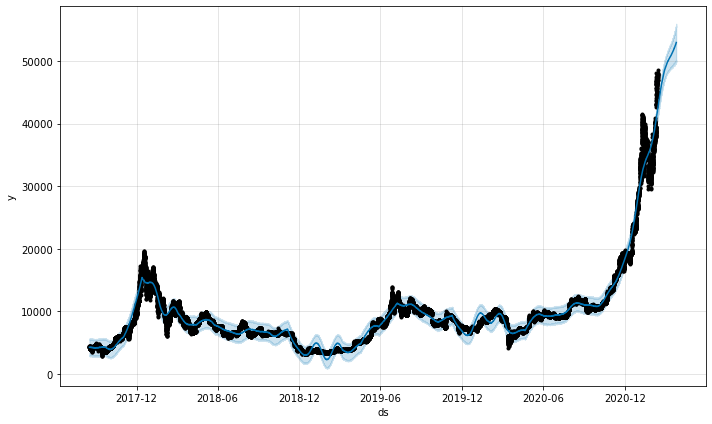

In [13]:
# Plot the Prophet predictions for the forecast_trends data
model.plot(forecast_trends);

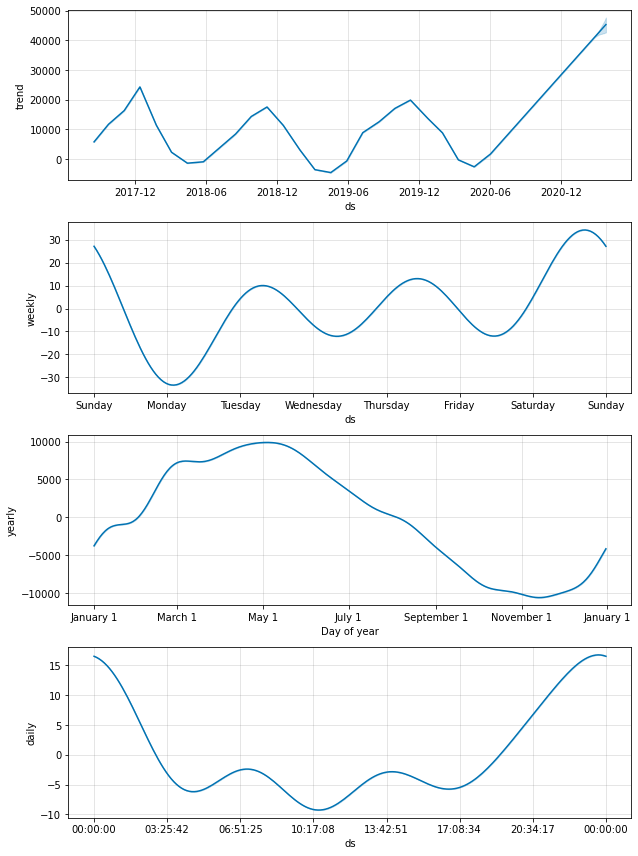

In [14]:
# Use the plot_components function to visualize the forecast results.
figures = model.plot_components(forecast_trends);